In [1]:
#Import packages:
import numpy as np
import pandas as pd
import requests
import csv
from io import StringIO
from datetime import datetime, timedelta

In [2]:
#Test code to extract data using requests from Elexon API- does not work for longer periods (use function below instead) 

#Date 
from_date = "2023-03-06T00%3A00Z"
to_date =  "2023-03-07T00%3A00Z"

#API URL
URL = f"https://data.elexon.co.uk/bmrs/api/v1/forecast/system/loss-of-load?from={from_date}&to={to_date}&settlementPeriodFrom=1&settlementPeriodTo=50&format=csv"

#Fetching data:
response = requests.get(URL)

if response.status_code == 200:
    print('CSV Data Successfully Accessed')
    df = pd.read_csv(StringIO(response.text), sep = ",", index_col=None, header=0)
    #print(df.head())
    print(df.shape)
    print(df.columns)
else:
    print("Error", response.status_code)

CSV Data Successfully Accessed
(480, 8)
Index(['PublishTime', 'PublishingPeriodCommencingTime', 'StartTime',
       'SettlementDate', 'SettlementPeriod', 'ForecastHorizon',
       'LossOfLoadProbability', 'DeratedMargin'],
      dtype='object')


In [3]:
# Inspect the test code data
df

,PublishTime,PublishingPeriodCommencingTime,StartTime,SettlementDate,SettlementPeriod,ForecastHorizon,LossOfLoadProbability,DeratedMargin
0,2023-03-05T23:08:53Z,2023-03-05T23:00:00Z,2023-03-06T00:00:00Z,2023-03-06,1,1,0.0,13592.693
1,2023-03-05T22:09:14Z,2023-03-05T22:00:00Z,2023-03-06T00:00:00Z,2023-03-06,1,2,0.0,13786.394
2,2023-03-05T20:09:36Z,2023-03-05T20:00:00Z,2023-03-06T00:00:00Z,2023-03-06,1,4,0.0,14323.063
3,2023-03-05T16:09:50Z,2023-03-05T16:00:00Z,2023-03-06T00:00:00Z,2023-03-06,1,8,0.0,14934.920
4,2023-03-05T12:10:36Z,2023-03-05T12:00:00Z,2023-03-06T00:00:00Z,2023-03-06,1,12,0.0,15305.893
...,...,...,...,...,...,...,...,...
475,2023-03-07T22:38:40Z,2023-03-07T22:30:00Z,2023-03-07T23:30:00Z,2023-03-07,48,1,0.0,13254.392
476,2023-03-07T21:39:25Z,2023-03-07T21:30:00Z,2023-03-07T23:30:00Z,2023-03-07,48,2,0.0,13371.916
477,2023-03-07T19:39:25Z,2023-03-07T19:30:00Z,2023-03-07T23:30:00Z,2023-03-07,48,4,0.0,14146.520
478,2023-03-07T15:39:39Z,2023-03-07T15:30:00Z,2023-03-07T23:30:00Z,2023-03-07,48,8,0.0,16947.697


In [4]:
# Function to fetch data for a given date range
def fetch_lolp_data(from_date, to_date):
    # Format dates for API
    from_date_str = from_date.strftime("%Y-%m-%dT00%%3A00Z")
    to_date_str = to_date.strftime("%Y-%m-%dT00%%3A00Z")
    
    # API URL
    URL = f"https://data.elexon.co.uk/bmrs/api/v1/forecast/system/loss-of-load?from={from_date_str}&to={to_date_str}&settlementPeriodFrom=1&settlementPeriodTo=50&format=csv"

    # Fetching data:
    response = requests.get(URL)

    if response.status_code == 200:
        print(f'CSV Data Successfully Accessed for {from_date.date()} to {to_date.date()}')
        df = pd.read_csv(StringIO(response.text), sep=",", index_col=None, header=0)
        return df
    else:
        print(f"Error fetching data for {from_date.date()}: {response.status_code}")
        return None

# Define date range
start_date = datetime(2024, 12, 1)  # Change as needed
end_date = datetime(2025, 3, 31)  # Change as needed

# List to store all dataframes
dataframes = []

# Loop through each day in the range
current_date = start_date
while current_date <= end_date:
    next_date = current_date + timedelta(days=1)  # Next day
    if next_date > end_date:
        next_date = end_date + timedelta(days=1)  # Ensure we cover the end date
    
    df = fetch_lolp_data(current_date, next_date)  # Fetch data
    
    if df is not None:
        dataframes.append(df)  # Add to the list

    current_date = next_date  # Move to next day

# Concatenate all dataframes into a single dataframe (if needed)
if dataframes:
    final_df = pd.concat(dataframes, ignore_index=True)

# Store final dataset
lolp_df = final_df

lolp_df['SettlementDate'] = pd.to_datetime(lolp_df['SettlementDate'])  # Convert to datetime

# Display the first few rows
print(lolp_df.head())

CSV Data Successfully Accessed for 2024-12-01 to 2024-12-02
CSV Data Successfully Accessed for 2024-12-02 to 2024-12-03
CSV Data Successfully Accessed for 2024-12-03 to 2024-12-04
CSV Data Successfully Accessed for 2024-12-04 to 2024-12-05
CSV Data Successfully Accessed for 2024-12-05 to 2024-12-06
CSV Data Successfully Accessed for 2024-12-06 to 2024-12-07
CSV Data Successfully Accessed for 2024-12-07 to 2024-12-08
CSV Data Successfully Accessed for 2024-12-08 to 2024-12-09
CSV Data Successfully Accessed for 2024-12-09 to 2024-12-10
CSV Data Successfully Accessed for 2024-12-10 to 2024-12-11
CSV Data Successfully Accessed for 2024-12-11 to 2024-12-12
CSV Data Successfully Accessed for 2024-12-12 to 2024-12-13
CSV Data Successfully Accessed for 2024-12-13 to 2024-12-14
CSV Data Successfully Accessed for 2024-12-14 to 2024-12-15
CSV Data Successfully Accessed for 2024-12-15 to 2024-12-16
CSV Data Successfully Accessed for 2024-12-16 to 2024-12-17
CSV Data Successfully Accessed for 2024-

In [5]:
# Check for duplicate rows
print(f'Number of duplicate rows: {lolp_df.duplicated().sum()}')

Number of duplicate rows: 28677


In [6]:
# Drop duplicate rows
lolp_df = lolp_df.copy()
lolp_df.drop_duplicates(inplace=True)

# Check the new dimensions
print(f'New dimensions: {lolp_df.shape}')

New dimensions: (29157, 8)


In [7]:
#Keep only forecast horizon 12
lolp_12 = lolp_df[lolp_df['ForecastHorizon'] == 12]
lolp_12

,PublishTime,PublishingPeriodCommencingTime,StartTime,SettlementDate,SettlementPeriod,ForecastHorizon,LossOfLoadProbability,DeratedMargin
4,2024-11-30T12:05:00Z,2024-11-30T12:00:00Z,2024-12-01T00:00:00Z,2024-12-01,1,12,0.0,28075.590
9,2024-11-30T12:35:28Z,2024-11-30T12:30:00Z,2024-12-01T00:30:00Z,2024-12-01,2,12,0.0,28456.877
14,2024-11-30T13:05:23Z,2024-11-30T13:00:00Z,2024-12-01T01:00:00Z,2024-12-01,3,12,0.0,29168.340
19,2024-11-30T13:35:25Z,2024-11-30T13:30:00Z,2024-12-01T01:30:00Z,2024-12-01,4,12,0.0,28953.174
24,2024-11-30T14:05:11Z,2024-11-30T14:00:00Z,2024-12-01T02:00:00Z,2024-12-01,5,12,0.0,29061.027
...,...,...,...,...,...,...,...,...
57813,2025-04-01T08:34:18Z,2025-04-01T08:30:00Z,2025-04-01T20:30:00Z,2025-04-01,44,12,0.0,20306.090
57818,2025-04-01T09:04:40Z,2025-04-01T09:00:00Z,2025-04-01T21:00:00Z,2025-04-01,45,12,0.0,21575.418
57823,2025-04-01T09:34:31Z,2025-04-01T09:30:00Z,2025-04-01T21:30:00Z,2025-04-01,46,12,0.0,20760.393
57828,2025-04-01T10:04:49Z,2025-04-01T10:00:00Z,2025-04-01T22:00:00Z,2025-04-01,47,12,0.0,19842.682


In [8]:
# Function to fetch data for a given date range
def fetch_demand_data(from_date, to_date):
    # Format dates for API
    from_date_str = from_date.strftime("%Y-%m-%dT00%%3A00Z")
    to_date_str = to_date.strftime("%Y-%m-%dT00%%3A00Z")
    
    # API URL
    URL = f"https://data.elexon.co.uk/bmrs/api/v1/forecast/demand/day-ahead/latest?from={from_date}&to={to_date}&settlementPeriodFrom=1&settlementPeriodTo=50&format=csv"

    # Fetching data:
    response = requests.get(URL)

    if response.status_code == 200:
        print(f'CSV Data Successfully Accessed for {from_date.date()} to {to_date.date()}')
        df = pd.read_csv(StringIO(response.text), sep=",", index_col=None, header=0)
        return df
    else:
        print(f"Error fetching data for {from_date.date()}: {response.status_code}")
        return None

# Define date range
start_date = datetime(2024, 12, 1)  # Change as needed
end_date = datetime(2025, 3, 31)  # Change as needed

# List to store all dataframes
dataframes = []

# Loop through each day in the range
current_date = start_date
while current_date <= end_date:
    next_date = current_date + timedelta(days=1)  # Next day
    if next_date > end_date:
        next_date = end_date + timedelta(days=1)  # Ensure we cover the end date
    
    df = fetch_demand_data(current_date, next_date)  # Fetch data
    
    if df is not None:
        dataframes.append(df)  # Add to the list

    current_date = next_date  # Move to next day

# Concatenate all dataframes into a single dataframe (if needed)
if dataframes:
    final_df = pd.concat(dataframes, ignore_index=True)

# Store final dataset
demand_df = final_df

# Drop dates outside of 2021 to 2024<
demand_df['SettlementDate'] = pd.to_datetime(demand_df['SettlementDate'])  # Convert to datetime

# Display the first few rows
print(demand_df.head())

CSV Data Successfully Accessed for 2024-12-01 to 2024-12-02
CSV Data Successfully Accessed for 2024-12-02 to 2024-12-03
CSV Data Successfully Accessed for 2024-12-03 to 2024-12-04
CSV Data Successfully Accessed for 2024-12-04 to 2024-12-05
CSV Data Successfully Accessed for 2024-12-05 to 2024-12-06
CSV Data Successfully Accessed for 2024-12-06 to 2024-12-07
CSV Data Successfully Accessed for 2024-12-07 to 2024-12-08
CSV Data Successfully Accessed for 2024-12-08 to 2024-12-09
CSV Data Successfully Accessed for 2024-12-09 to 2024-12-10
CSV Data Successfully Accessed for 2024-12-10 to 2024-12-11
CSV Data Successfully Accessed for 2024-12-11 to 2024-12-12
CSV Data Successfully Accessed for 2024-12-12 to 2024-12-13
CSV Data Successfully Accessed for 2024-12-13 to 2024-12-14
CSV Data Successfully Accessed for 2024-12-14 to 2024-12-15
CSV Data Successfully Accessed for 2024-12-15 to 2024-12-16
CSV Data Successfully Accessed for 2024-12-16 to 2024-12-17
CSV Data Successfully Accessed for 2024-

In [9]:
print(f'Number of duplicate rows: {demand_df.duplicated().sum()}')

Number of duplicate rows: 142


In [10]:
# Drop duplicate rows
demand_df = demand_df.copy()
demand_df.drop_duplicates(inplace=True)

# Check the new dimensions
print(f'New dimensions: {demand_df.shape}')

New dimensions: (5809, 7)


In [11]:
# Function to fetch data for a given date range
def fetch_generation_data(from_date, to_date):
    # Format dates for API
    from_date_str = from_date.strftime("%Y-%m-%dT00%%3A00Z")
    to_date_str = to_date.strftime("%Y-%m-%dT00%%3A00Z")
    
    # API URL
    URL = f"https://data.elexon.co.uk/bmrs/api/v1/forecast/generation/day-ahead?from={from_date}&to={to_date}&settlementPeriodFrom=1&settlementPeriodTo=50&format=csv"

    # Fetching data:
    response = requests.get(URL)

    if response.status_code == 200:
        print(f'CSV Data Successfully Accessed for {from_date.date()} to {to_date.date()}')
        df = pd.read_csv(StringIO(response.text), sep=",", index_col=None, header=0)
        return df
    else:
        print(f"Error fetching data for {from_date.date()}: {response.status_code}")
        return None

# Define date range
start_date = datetime(2024, 12, 1)  # Change as needed
end_date = datetime(2025, 3, 31)  # Change as needed

# List to store all dataframes
dataframes = []

# Loop through each day in the range
current_date = start_date
while current_date <= end_date:
    next_date = current_date + timedelta(days=1)  # Next day
    if next_date > end_date:
        next_date = end_date + timedelta(days=1)  # Ensure we cover the end date
    
    df = fetch_generation_data(current_date, next_date)  # Fetch data
    
    if df is not None:
        dataframes.append(df)  # Add to the list

    current_date = next_date  # Move to next day

# Concatenate all dataframes into a single dataframe (if needed)
if dataframes:
    final_df = pd.concat(dataframes, ignore_index=True)

# Store final dataset
generation_df = final_df

# Drop dates outside of 2021 to 2024<
generation_df['SettlementDate'] = pd.to_datetime(generation_df['SettlementDate'])  # Convert to datetime

# Display the first few rows
print(generation_df.head())

CSV Data Successfully Accessed for 2024-12-01 to 2024-12-02
CSV Data Successfully Accessed for 2024-12-02 to 2024-12-03
CSV Data Successfully Accessed for 2024-12-03 to 2024-12-04
CSV Data Successfully Accessed for 2024-12-04 to 2024-12-05
CSV Data Successfully Accessed for 2024-12-05 to 2024-12-06
CSV Data Successfully Accessed for 2024-12-06 to 2024-12-07
CSV Data Successfully Accessed for 2024-12-07 to 2024-12-08
CSV Data Successfully Accessed for 2024-12-08 to 2024-12-09
CSV Data Successfully Accessed for 2024-12-09 to 2024-12-10
CSV Data Successfully Accessed for 2024-12-10 to 2024-12-11
CSV Data Successfully Accessed for 2024-12-11 to 2024-12-12
CSV Data Successfully Accessed for 2024-12-12 to 2024-12-13
CSV Data Successfully Accessed for 2024-12-13 to 2024-12-14
CSV Data Successfully Accessed for 2024-12-14 to 2024-12-15
CSV Data Successfully Accessed for 2024-12-15 to 2024-12-16
CSV Data Successfully Accessed for 2024-12-16 to 2024-12-17
CSV Data Successfully Accessed for 2024-

In [12]:
print(f'Number of duplicate rows: {generation_df.duplicated().sum()}')

Number of duplicate rows: 5710


In [13]:
# Drop duplicate rows
generation_df = generation_df.copy()
generation_df.drop_duplicates(inplace=True)

# Check the new dimensions
print(f'New dimensions: {demand_df.shape}')

New dimensions: (5809, 7)


In [14]:
print(lolp_12.shape)
print(generation_df.shape)
print(demand_df.shape)

(5854, 8)
(5806, 5)
(5809, 7)


In [15]:
demand_df.head()

,StartTime,SettlementDate,SettlementPeriod,Boundary,PublishTime,TransmissionSystemDemand,NationalDemand
0,2024-12-01T00:00:00Z,2024-12-01,1,N,2024-11-30T23:46:00Z,24905,21800.0
1,2024-12-01T00:30:00Z,2024-12-01,2,N,2024-12-01T00:16:00Z,25002,21900.0
2,2024-12-01T01:00:00Z,2024-12-01,3,N,2024-12-01T00:46:00Z,24506,NaN
3,2024-12-01T01:30:00Z,2024-12-01,4,N,2024-12-01T01:16:00Z,23893,20795.0
4,2024-12-01T02:00:00Z,2024-12-01,5,N,2024-12-01T01:46:00Z,23369,20255.0


In [16]:
generation_df.head()

,PublishTime,Quantity,StartTime,SettlementDate,SettlementPeriod
0,2024-12-01T16:45:06Z,23169.0,2024-12-02T23:30:00Z,2024-12-02,48
1,2024-12-01T16:45:06Z,25501.0,2024-12-02T23:00:00Z,2024-12-02,47
2,2024-12-01T16:45:06Z,28783.0,2024-12-02T22:30:00Z,2024-12-02,46
3,2024-12-01T16:45:06Z,29909.0,2024-12-02T22:00:00Z,2024-12-02,45
4,2024-12-01T16:45:06Z,30711.0,2024-12-02T21:30:00Z,2024-12-02,44


In [17]:
generation_slice = generation_df[["StartTime", "Quantity"]]
generation_slice = generation_slice.rename(columns={'Quantity': 'GenerationForecast'})
generation_slice

,StartTime,GenerationForecast
0,2024-12-02T23:30:00Z,23169.0
1,2024-12-02T23:00:00Z,25501.0
2,2024-12-02T22:30:00Z,28783.0
3,2024-12-02T22:00:00Z,29909.0
4,2024-12-02T21:30:00Z,30711.0
...,...,...
11463,2025-04-01T01:00:00Z,1594.0
11464,2025-04-01T00:30:00Z,1556.0
11465,2025-04-01T00:00:00Z,1515.0
11466,2025-03-31T23:30:00Z,1571.0


In [18]:
demand_slice = demand_df[["StartTime", "TransmissionSystemDemand", "NationalDemand"]]
demand_slice

,StartTime,TransmissionSystemDemand,NationalDemand
0,2024-12-01T00:00:00Z,24905,21800.0
1,2024-12-01T00:30:00Z,25002,21900.0
2,2024-12-01T01:00:00Z,24506,NaN
3,2024-12-01T01:30:00Z,23893,20795.0
4,2024-12-01T02:00:00Z,23369,20255.0
...,...,...,...
5946,2025-03-31T22:00:00Z,24417,23859.0
5947,2025-03-31T22:30:00Z,23159,22590.0
5948,2025-03-31T23:00:00Z,23078,22570.0
5949,2025-03-31T23:30:00Z,22716,NaN


In [19]:
merged_df = pd.merge(generation_slice, demand_slice, on='StartTime', how="left")
merged_df

,StartTime,GenerationForecast,TransmissionSystemDemand,NationalDemand
0,2024-12-02T23:30:00Z,23169.0,27864.0,26300.0
1,2024-12-02T23:00:00Z,25501.0,28719.0,27139.0
2,2024-12-02T22:30:00Z,28783.0,30343.0,28763.0
3,2024-12-02T22:00:00Z,29909.0,31793.0,30213.0
4,2024-12-02T21:30:00Z,30711.0,33246.0,31666.0
...,...,...,...,...
5801,2025-04-01T01:00:00Z,1594.0,NaN,NaN
5802,2025-04-01T00:30:00Z,1556.0,NaN,NaN
5803,2025-04-01T00:00:00Z,1515.0,22805.0,22305.0
5804,2025-03-31T23:30:00Z,1571.0,22716.0,NaN


In [20]:
lolp_12.head()

,PublishTime,PublishingPeriodCommencingTime,StartTime,SettlementDate,SettlementPeriod,ForecastHorizon,LossOfLoadProbability,DeratedMargin
4,2024-11-30T12:05:00Z,2024-11-30T12:00:00Z,2024-12-01T00:00:00Z,2024-12-01,1,12,0.0,28075.590
9,2024-11-30T12:35:28Z,2024-11-30T12:30:00Z,2024-12-01T00:30:00Z,2024-12-01,2,12,0.0,28456.877
14,2024-11-30T13:05:23Z,2024-11-30T13:00:00Z,2024-12-01T01:00:00Z,2024-12-01,3,12,0.0,29168.340
19,2024-11-30T13:35:25Z,2024-11-30T13:30:00Z,2024-12-01T01:30:00Z,2024-12-01,4,12,0.0,28953.174
24,2024-11-30T14:05:11Z,2024-11-30T14:00:00Z,2024-12-01T02:00:00Z,2024-12-01,5,12,0.0,29061.027


In [21]:
lolp_slice = lolp_12[["StartTime", "LossOfLoadProbability", "DeratedMargin"]]
lolp_slice

,StartTime,LossOfLoadProbability,DeratedMargin
4,2024-12-01T00:00:00Z,0.0,28075.590
9,2024-12-01T00:30:00Z,0.0,28456.877
14,2024-12-01T01:00:00Z,0.0,29168.340
19,2024-12-01T01:30:00Z,0.0,28953.174
24,2024-12-01T02:00:00Z,0.0,29061.027
...,...,...,...
57813,2025-04-01T20:30:00Z,0.0,20306.090
57818,2025-04-01T21:00:00Z,0.0,21575.418
57823,2025-04-01T21:30:00Z,0.0,20760.393
57828,2025-04-01T22:00:00Z,0.0,19842.682


In [22]:
merged_df_2 = pd.merge(merged_df, lolp_slice, on = "StartTime", how="left")
merged_df_2

,StartTime,GenerationForecast,TransmissionSystemDemand,NationalDemand,LossOfLoadProbability,DeratedMargin
0,2024-12-02T23:30:00Z,23169.0,27864.0,26300.0,0.0,17299.035
1,2024-12-02T23:00:00Z,25501.0,28719.0,27139.0,0.0,16231.799
2,2024-12-02T22:30:00Z,28783.0,30343.0,28763.0,0.0,18456.512
3,2024-12-02T22:00:00Z,29909.0,31793.0,30213.0,0.0,15906.989
4,2024-12-02T21:30:00Z,30711.0,33246.0,31666.0,0.0,14079.689
...,...,...,...,...,...,...
5801,2025-04-01T01:00:00Z,1594.0,NaN,NaN,0.0,20883.678
5802,2025-04-01T00:30:00Z,1556.0,NaN,NaN,0.0,20476.129
5803,2025-04-01T00:00:00Z,1515.0,22805.0,22305.0,0.0,17990.557
5804,2025-03-31T23:30:00Z,1571.0,22716.0,NaN,0.0,16104.634


In [23]:
merged_df_2["StartTime"].dtype

dtype('O')

In [24]:
dfs = pd.read_csv("dfs-utilisation-report-summary.csv")
dfs.head()

,StartTime,Delivery Date,From,To,Service Requirement Type,Service Requirement MW,DFS Procured MW,DFS Provider Bids Accepted Total Cost GBP,Average accepted bid GBP per MWh
0,2025-03-31T16:00:00Z,31/03/2025,16:00:00,16:30,Live,500,6.9,368.15,106.7101449
1,2025-03-31T16:30:00Z,31/03/2025,16:30:00,17:00,Live,500,6.6,352.70,106.8787879
2,2025-03-31T17:00:00Z,31/03/2025,17:00:00,17:30,Live,500,2.2,134.50,122.2727273
3,2025-03-31T17:30:00Z,31/03/2025,17:30:00,18:00,Live,500,2.2,134.50,122.2727273
4,2025-03-28T18:00:00Z,28/03/2025,18:00:00,18:30,Live,500,11.7,752.50,128.6324786


In [25]:
dfs_slice = dfs[["StartTime", "Average accepted bid GBP per MWh"]]
dfs_slice

,StartTime,Average accepted bid GBP per MWh
0,2025-03-31T16:00:00Z,106.7101449
1,2025-03-31T16:30:00Z,106.8787879
2,2025-03-31T17:00:00Z,122.2727273
3,2025-03-31T17:30:00Z,122.2727273
4,2025-03-28T18:00:00Z,128.6324786
...,...,...
303,2024-11-29T16:30:00Z,0
304,2024-11-29T17:00:00Z,0
305,2024-11-29T17:30:00Z,0
306,2024-11-29T18:00:00Z,0


In [26]:
merged_3 = pd.merge(merged_df_2, dfs_slice, on="StartTime", how="left")
merged_3

,StartTime,GenerationForecast,TransmissionSystemDemand,NationalDemand,LossOfLoadProbability,DeratedMargin,Average accepted bid GBP per MWh
0,2024-12-02T23:30:00Z,23169.0,27864.0,26300.0,0.0,17299.035,NaN
1,2024-12-02T23:00:00Z,25501.0,28719.0,27139.0,0.0,16231.799,NaN
2,2024-12-02T22:30:00Z,28783.0,30343.0,28763.0,0.0,18456.512,NaN
3,2024-12-02T22:00:00Z,29909.0,31793.0,30213.0,0.0,15906.989,NaN
4,2024-12-02T21:30:00Z,30711.0,33246.0,31666.0,0.0,14079.689,NaN
...,...,...,...,...,...,...,...
5801,2025-04-01T01:00:00Z,1594.0,NaN,NaN,0.0,20883.678,NaN
5802,2025-04-01T00:30:00Z,1556.0,NaN,NaN,0.0,20476.129,NaN
5803,2025-04-01T00:00:00Z,1515.0,22805.0,22305.0,0.0,17990.557,NaN
5804,2025-03-31T23:30:00Z,1571.0,22716.0,NaN,0.0,16104.634,NaN


In [27]:
merged_3['ServiceRequirement'] = np.where(merged_3['Average accepted bid GBP per MWh'].isna(), 0, 1)
merged_3

,StartTime,GenerationForecast,TransmissionSystemDemand,NationalDemand,LossOfLoadProbability,DeratedMargin,Average accepted bid GBP per MWh,ServiceRequirement
0,2024-12-02T23:30:00Z,23169.0,27864.0,26300.0,0.0,17299.035,NaN,0
1,2024-12-02T23:00:00Z,25501.0,28719.0,27139.0,0.0,16231.799,NaN,0
2,2024-12-02T22:30:00Z,28783.0,30343.0,28763.0,0.0,18456.512,NaN,0
3,2024-12-02T22:00:00Z,29909.0,31793.0,30213.0,0.0,15906.989,NaN,0
4,2024-12-02T21:30:00Z,30711.0,33246.0,31666.0,0.0,14079.689,NaN,0
...,...,...,...,...,...,...,...,...
5801,2025-04-01T01:00:00Z,1594.0,NaN,NaN,0.0,20883.678,NaN,0
5802,2025-04-01T00:30:00Z,1556.0,NaN,NaN,0.0,20476.129,NaN,0
5803,2025-04-01T00:00:00Z,1515.0,22805.0,22305.0,0.0,17990.557,NaN,0
5804,2025-03-31T23:30:00Z,1571.0,22716.0,NaN,0.0,16104.634,NaN,0


In [28]:
merged_3.isna().sum()

StartTime                              0
GenerationForecast                     0
TransmissionSystemDemand              45
NationalDemand                       137
LossOfLoadProbability                  0
DeratedMargin                          0
Average accepted bid GBP per MWh    5510
ServiceRequirement                     0
dtype: int64

In [29]:
merged_clean = merged_3.dropna(subset=['TransmissionSystemDemand', 'NationalDemand'])
merged_clean

,StartTime,GenerationForecast,TransmissionSystemDemand,NationalDemand,LossOfLoadProbability,DeratedMargin,Average accepted bid GBP per MWh,ServiceRequirement
0,2024-12-02T23:30:00Z,23169.0,27864.0,26300.0,0.0,17299.035,NaN,0
1,2024-12-02T23:00:00Z,25501.0,28719.0,27139.0,0.0,16231.799,NaN,0
2,2024-12-02T22:30:00Z,28783.0,30343.0,28763.0,0.0,18456.512,NaN,0
3,2024-12-02T22:00:00Z,29909.0,31793.0,30213.0,0.0,15906.989,NaN,0
4,2024-12-02T21:30:00Z,30711.0,33246.0,31666.0,0.0,14079.689,NaN,0
...,...,...,...,...,...,...,...,...
5754,2025-03-31T00:30:00Z,588.0,23876.0,22400.0,0.0,19932.180,NaN,0
5756,2025-03-30T23:30:00Z,490.0,23466.0,21900.0,0.0,14623.839,NaN,0
5757,2025-03-30T23:00:00Z,476.0,23915.0,22200.0,0.0,13964.422,NaN,0
5803,2025-04-01T00:00:00Z,1515.0,22805.0,22305.0,0.0,17990.557,NaN,0


In [30]:
merged_3["ServiceRequirement"].value_counts()

ServiceRequirement
0    5510
1     296
Name: count, dtype: int64

In [31]:
merged_3['Generation-Demand-Diff'] = merged_3['GenerationForecast'] - merged_3['TransmissionSystemDemand']
merged_3

,StartTime,GenerationForecast,TransmissionSystemDemand,NationalDemand,LossOfLoadProbability,DeratedMargin,Average accepted bid GBP per MWh,ServiceRequirement,Generation-Demand-Diff
0,2024-12-02T23:30:00Z,23169.0,27864.0,26300.0,0.0,17299.035,NaN,0,-4695.0
1,2024-12-02T23:00:00Z,25501.0,28719.0,27139.0,0.0,16231.799,NaN,0,-3218.0
2,2024-12-02T22:30:00Z,28783.0,30343.0,28763.0,0.0,18456.512,NaN,0,-1560.0
3,2024-12-02T22:00:00Z,29909.0,31793.0,30213.0,0.0,15906.989,NaN,0,-1884.0
4,2024-12-02T21:30:00Z,30711.0,33246.0,31666.0,0.0,14079.689,NaN,0,-2535.0
...,...,...,...,...,...,...,...,...,...
5801,2025-04-01T01:00:00Z,1594.0,NaN,NaN,0.0,20883.678,NaN,0,NaN
5802,2025-04-01T00:30:00Z,1556.0,NaN,NaN,0.0,20476.129,NaN,0,NaN
5803,2025-04-01T00:00:00Z,1515.0,22805.0,22305.0,0.0,17990.557,NaN,0,-21290.0
5804,2025-03-31T23:30:00Z,1571.0,22716.0,NaN,0.0,16104.634,NaN,0,-21145.0


In [32]:
filtered = merged_3[
    merged_3['StartTime'].str.endswith('16:00:00Z', na=False) |
    merged_3['StartTime'].str.endswith('16:30:00Z', na=False) |
    merged_3['StartTime'].str.endswith('17:00:00Z', na=False) |
    merged_3['StartTime'].str.endswith('17:30:00Z', na=False) |
    merged_3['StartTime'].str.endswith('18:00:00Z', na=False) |
    merged_3['StartTime'].str.endswith('18:30:00Z', na=False) 
]
filtered

,StartTime,GenerationForecast,TransmissionSystemDemand,NationalDemand,LossOfLoadProbability,DeratedMargin,Average accepted bid GBP per MWh,ServiceRequirement,Generation-Demand-Diff
10,2024-12-02T18:30:00Z,38371.0,40544.0,38927.0,1.000000e-07,9978.375,0,1,-2173.0
11,2024-12-02T18:00:00Z,39213.0,41506.0,39889.0,2.000000e-07,9871.779,0,1,-2293.0
12,2024-12-02T17:30:00Z,39653.0,42429.0,40000.0,6.000000e-07,9097.869,0,1,-2776.0
13,2024-12-02T17:00:00Z,39898.0,42039.0,39610.0,8.000000e-07,8952.134,0,1,-2141.0
14,2024-12-02T16:30:00Z,40071.0,41404.0,39494.0,2.000000e-07,9714.507,0,1,-1333.0
...,...,...,...,...,...,...,...,...,...
5767,2025-04-01T18:00:00Z,3078.0,NaN,NaN,0.000000e+00,16273.887,NaN,0,NaN
5768,2025-04-01T17:30:00Z,3607.0,NaN,NaN,0.000000e+00,15609.282,NaN,0,NaN
5769,2025-04-01T17:00:00Z,4549.0,NaN,NaN,0.000000e+00,16460.553,NaN,0,NaN
5770,2025-04-01T16:30:00Z,5631.0,NaN,NaN,0.000000e+00,17742.668,NaN,0,NaN


In [33]:
filtered["ServiceRequirement"].value_counts()

ServiceRequirement
0    430
1    296
Name: count, dtype: int64

In [34]:
merged_3["ServiceRequirement"].value_counts()

ServiceRequirement
0    5510
1     296
Name: count, dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_absolute_error, roc_auc_score

# Load dataset

# STEP 1: Prepare features and target
features = filtered.columns[np.r_[1:6, 8]] 

# Classification task
X_class = filtered[features]
y_class = filtered['ServiceRequirement']

# STEP 2: Train/test split for classification
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class, y_class, test_size=0.25, random_state=42)

# Train classifier
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_c, y_train_c)

# Predict and evaluate
y_pred_c = clf.predict(X_test_c)
print("Classification Report:")
print(classification_report(y_test_c, y_pred_c))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       116
           1       0.68      0.76      0.71        66

    accuracy                           0.78       182
   macro avg       0.76      0.78      0.77       182
weighted avg       0.79      0.78      0.78       182



In [36]:
print("ROC AUC Score:", roc_auc_score(y_test_c, clf.predict_proba(X_test_c)[:, 1]))

ROC AUC Score: 0.8804205851619644


                    Feature  Importance
4             DeratedMargin    0.136813
0        GenerationForecast    0.063736
2            NationalDemand    0.057692
1  TransmissionSystemDemand    0.056044
5    Generation-Demand-Diff    0.024176
3     LossOfLoadProbability    0.010989


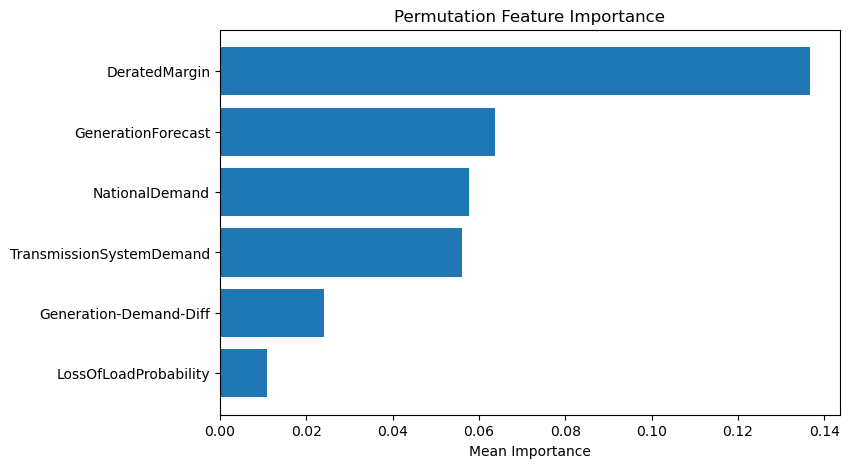

In [37]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Compute permutation importance
result = permutation_importance(clf, X_test_c, y_test_c, n_repeats=10, random_state=42)

# Show results
importance_df = pd.DataFrame({
    'Feature': X_class.columns,
    'Importance': result.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Optional: Plot
plt.figure(figsize=(8, 5))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Mean Importance")
plt.title("Permutation Feature Importance")
plt.show()


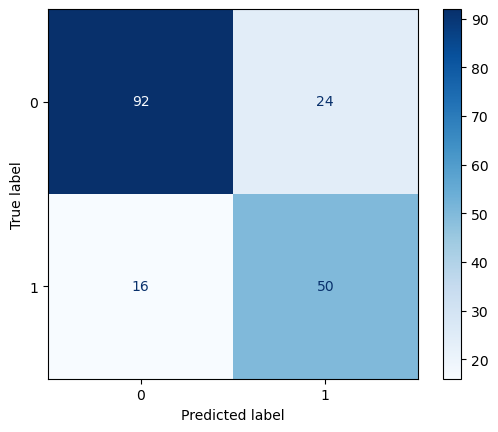

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict labels
y_pred_c = clf.predict(X_test_c)

# Generate confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap='Blues')


In [94]:
merged_3.columns

Index(['StartTime', 'GenerationForecast', 'TransmissionSystemDemand',
       'NationalDemand', 'LossOfLoadProbability', 'DeratedMargin',
       'Average accepted bid GBP per MWh', 'ServiceRequirement',
       'Generation-Demand-Diff'],
      dtype='object')

In [90]:
df_clean.isna().sum()

StartTime                0
GenerationForecast       0
LossOfLoadProbability    0
DeratedMargin            0
ServiceRequirement       0
dtype: int64

In [112]:
df_clean = merged_3.dropna(axis=0)

In [114]:
df_clean.shape

(295, 9)

In [116]:
df_clean = df_clean[df_clean['Average accepted bid GBP per MWh'] != '#DIV/0!']

In [148]:
df_clean = df_clean[df_clean['Average accepted bid GBP per MWh'] != '0']

In [150]:
df_clean.shape

(213, 9)

In [152]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, mean_squared_error

# STEP 1: Filter only rows where service was required
#df_clean = [df_clean['Average accepted bid GBP per MWh'] != '#DIV/0!']

# STEP 2: Define features and target
features = merged_3.columns[np.r_[1:6, 8]]   # same features as before
target = 'Average accepted bid GBP per MWh'

X_fil = df_clean[features]
y_fil = df_clean[target]

# STEP 3: Train/test split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_fil, y_fil, test_size=0.25, random_state=42)

# STEP 4: Train regressor
reg = RandomForestRegressor(n_estimators=200, random_state=42)
reg.fit(X_train_r, y_train_r)

# STEP 5: Evaluate
y_pred_r = reg.predict(X_test_r)

mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = mean_squared_error(y_test_r, y_pred_r, squared=False)
r2 = r2_score(y_test_r, y_pred_r)

print("📊 Regression Results:")
print(f"MAE  : {mae:.2f} GBP/MWh")
print(f"RMSE : {rmse:.2f} GBP/MWh")
print(f"R²   : {r2:.2f}")

📊 Regression Results:
MAE  : 25.05 GBP/MWh
RMSE : 44.72 GBP/MWh
R²   : 0.62


C:\Users\amun0\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\amun0\AppData\Local\Temp\ipykernel_24236\721209934.py:10: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\amun0\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


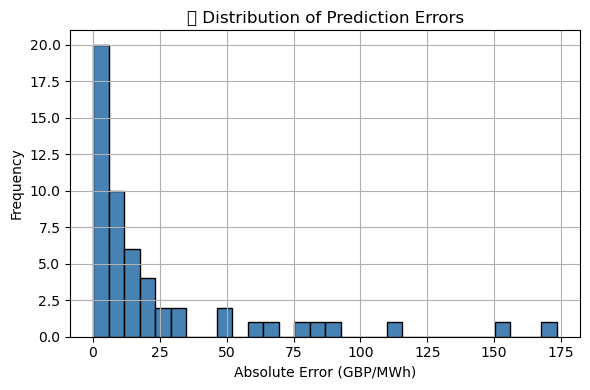

In [154]:
y_test_r = pd.to_numeric(y_test_r, errors='coerce')
errors = abs(y_test_r - y_pred_r)

plt.figure(figsize=(6, 4))
plt.hist(errors, bins=30, color='steelblue', edgecolor='black')
plt.xlabel("Absolute Error (GBP/MWh)")
plt.ylabel("Frequency")
plt.title("📦 Distribution of Prediction Errors")
plt.grid(True)
plt.tight_layout()
plt.show()



In [156]:
# 2. Get feature importances
importances = reg.feature_importances_

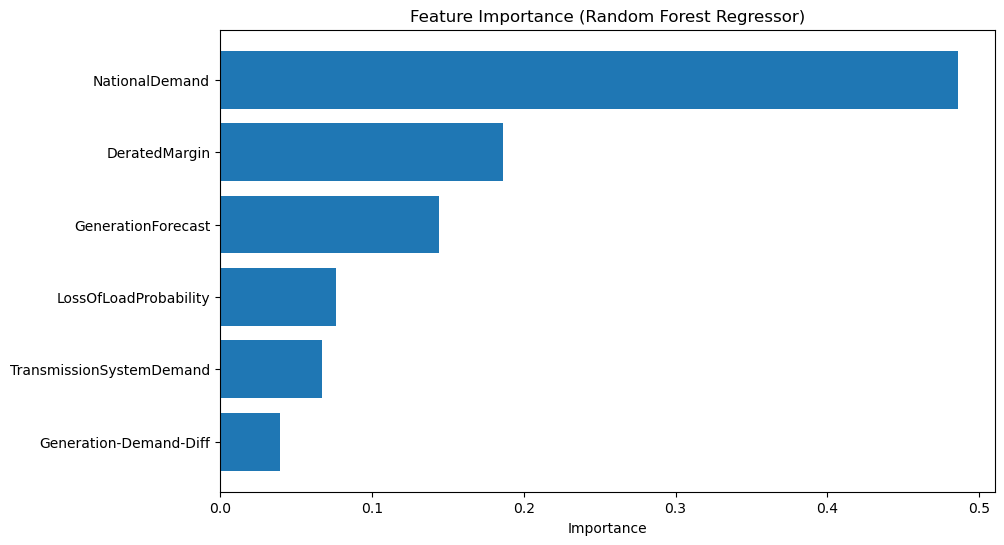

In [158]:
# 3. Create a DataFrame for easy viewing
feature_importance_df = pd.DataFrame({
    'Feature': X_fil.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 4. Optional: Plot it
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest Regressor)')
plt.show()

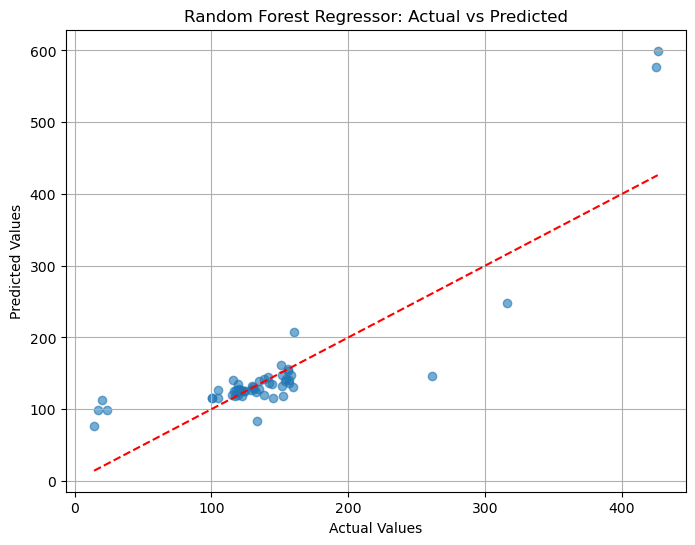

In [160]:
# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_r, y_pred_r, alpha=0.6)
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--')  # identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: Actual vs Predicted')
plt.grid(True)
plt.show()